In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('listings.csv')

df = df[df.minimum_nights < 30]
df = df[df.price < 300]
df = df[df.room_type.apply(lambda x: x in ('Entire home/apt', 'Private room'))]
df['room_type'] = df['room_type'].replace({'Entire home/apt':1, 'Private room':2})
df = df[['room_type', 'minimum_nights', 'price']]
df.corr()

,room_type,minimum_nights,price
room_type,1.000000,-0.102199,-0.491517
minimum_nights,-0.102199,1.000000,-0.028234
price,-0.491517,-0.028234,1.000000


Text(0.5, 1.0, 'Price vs minimum nights for Airbnb listings,\ncolored by accomodation type')

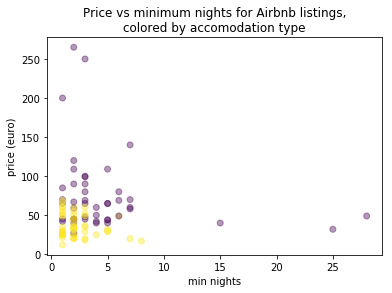

In [4]:
df_sampled = df.sample(100)
plt.scatter(x=df_sampled['minimum_nights'], y=df_sampled['price'], c=df_sampled['room_type'],
           alpha=.4)
plt.xlabel('min nights')
plt.ylabel('price (euro)')
plt.title('Price vs minimum nights for Airbnb listings,\ncolored by accomodation type')

In [5]:
df_sampled['room_type']=df_sampled['room_type'].replace({1:'Entire home', 2:'Private room'})
df_sampled.to_csv('../berlin_airbnb.csv', index=False)

In [42]:
df_sampled = df_sampled.reset_index(drop=True)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_sampled[['minimum_nights', 'price']])
x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df.columns = ['minimum_nights', 'price']
df_of_comparison_values = pd.DataFrame({'minimum_nights': [8], 'price': [160]})
x1_scaled, y1_scaled = min_max_scaler.transform(df_of_comparison_values)[0]

In [43]:
def euclidean(x1, x2, y1, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

df_sampled['distance'] = x_scaled_df.apply(
    lambda r: euclidean(x1_scaled, r['minimum_nights'], y1_scaled, r['price']),
    axis=1
)
df_sampled_sorted = df_sampled.sort_values(by='distance')
# part1 = df_sampled_sorted[:50]
# part2 = df_sampled_sorted[51:].sample(100)
df_sampled_sorted.to_csv('../berlin_airbnb_small.csv', index=False)

In [45]:
df_sampled_sorted #.sort_values(by='distance')

,room_type,minimum_nights,price,distance
37,Entire home,7,140,0.087298
80,Entire home,5,109,0.230175
22,Entire home,2,120,0.272726
84,Entire home,2,109,0.300029
3,Entire home,3,100,0.300891
53,Entire home,1,200,0.303664
62,Entire home,3,99,0.304016
65,Entire home,6,80,0.324766
97,Entire home,3,90,0.332934
1,Entire home,2,90,0.354872
